## Imports, Constants, and Classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.svm import SVC

from sklearn import metrics
from sklearn.utils import shuffle

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

RANDOM_SEED = 42

class StemCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemCountVectorizer, self).build_analyzer()
        
        return lambda document: ([SnowballStemmer('english', ignore_stopwords=True).stem(word) for word in analyzer(document)])
    
mcu = pd.read_csv("./data/mcu.csv")

## Dataset Preprocessing

In [2]:
min_line_count = 150

is_main_character = mcu["character"].value_counts() > min_line_count
is_main_character = is_main_character.rename("is main character", axis=0)

main_character_rows = is_main_character[mcu["character"]]
main_character_rows = main_character_rows.reset_index(drop=True)

mcu_partial = mcu[main_character_rows]

pd.DataFrame(is_main_character)[is_main_character]

,is main character
TONY STARK,True
THOR,True
STEVE ROGERS,True
BRUCE BANNER,True
PETER QUILL,True
ROCKET,True
NATASHA,True
PEPPER POTTS,True
LOKI,True


In [3]:
y = mcu_partial["character"].to_numpy().astype(str)
X = mcu_partial["line"].to_numpy().astype(str)

X, y = shuffle(X, y, random_state=RANDOM_SEED)

X[0:10], y[0:10]

(array(['Got it.', 'And terrifying.', 'What’s the delta rate?',
        'This is beyond you, metal man. Loki will face Asgardian justice. ',
        'He was kidding.', 'Was he married?',
        'Is this about the Avengers?  Which I know nothing about.',
        'Oh, sure, okayyyy, Quill.', 'Can I ask a few back?',
        'Stark, are you seeing this? '], dtype='<U606'),
 array(['BRUCE BANNER', 'PEPPER POTTS', 'TONY STARK', 'THOR', 'NATASHA',
        'STEVE ROGERS', 'PEPPER POTTS', 'ROCKET', 'TONY STARK',
        'STEVE ROGERS'], dtype='<U12'))

## Models

In [6]:
cross_validator = StratifiedKFold(n_splits=5, random_state=RANDOM_SEED, shuffle=True)
score_method = "balanced_accuracy"

In [7]:
count_vectorizer = CountVectorizer()
stem_count_vectorizer = StemCountVectorizer()

tfidf_transformer = TfidfTransformer()

svm_classifier = SVC()

In [8]:
count_params = {'vect__binary': [True, False],
               'vect__stop_words': [None, 'english', stopwords.words('english')],
              'vect__ngram_range': [(1,1), (1,2), (1,3)]}

tfidf_params = {'tfidf__norm': ['l1', 'l2'],
              'tfidf__use_idf': [True, False]}

svm_params = {'clf__C': [1e-2, 1e-1, 0, 1, 10, 100],
              'clf__kernel': ['linear', 'poly', 'rbf'],
              'clf__degree': [2,3,4,5,6],
              'clf__gamma': ['scale', 'auto'],
              'clf__class_weight': [None, 'balanced']}

### Model 9 (SVM, no TFIDF, no stemming) <a name="model9"></a>

In [8]:
pipe9 = Pipeline([('vect', count_vectorizer), 
                  ('clf', svm_classifier)])

parameters9 = {**count_params, **svm_params}

grid9 = GridSearchCV(pipe9, parameters9, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid9.fit(X,y)

grid9.best_params_

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

{'clf__C': 0.1,
 'clf__class_weight': 'balanced',
 'clf__degree': 2,
 'clf__gamma': 'scale',
 'clf__kernel': 'linear',
 'vect__binary': True,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into'

In [9]:
model9 = Pipeline([('vect', CountVectorizer(binary=True, ngram_range = (1,1), stop_words = stopwords.words('english'))),
                  ('clf', SVC(C=0.1, class_weight='balanced', degree=2, gamma="scale", kernel='linear'))])

### Model 10 (SVM, TFIDF, no stemming) <a name="model10"></a>

In [9]:
pipe10 = Pipeline([('vect', count_vectorizer),
                  ('tfidf', tfidf_transformer),
                  ('clf', svm_classifier)])

parameters10 = {**count_params, **tfidf_params, **svm_params}

grid10 = GridSearchCV(pipe10, parameters10, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid10.fit(X,y)

grid10.best_params_

Fitting 5 folds for each of 25920 candidates, totalling 129600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

{'clf__C': 100,
 'clf__class_weight': None,
 'clf__degree': 2,
 'clf__gamma': 'scale',
 'clf__kernel': 'linear',
 'tfidf__norm': 'l1',
 'tfidf__use_idf': True,
 'vect__binary': True,
 'vect__ngram_range': (1, 2),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'a

In [10]:
model10 = Pipeline([('vect', CountVectorizer(binary=True, ngram_range = (1,2), stop_words = stopwords.words('english'))),
                    ('tfidf', TfidfTransformer(norm='l1', use_idf=True)),
                  ('clf', SVC(C=100, class_weight=None, degree=2, gamma="scale", kernel='linear'))])

### Model 11 (SVM, no TFIDF,  stemming) <a name="model11"></a>

In [23]:
pipe11 = Pipeline([('vect', stem_count_vectorizer),
                  ('clf', svm_classifier)])

parameters11 = {**count_params, **svm_params}

grid11 = GridSearchCV(pipe11, parameters11, cv=cross_validator, scoring=score_method, n_jobs=-1, verbose=3)

grid11.fit(X,y)

grid11.best_params_

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 88.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 109.0min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed: 131.8min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed: 157.0min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed: 184.3min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed: 214.8min
[Parallel(n_jobs=-1)]: Done 7176 tasks   

{'clf__C': 0.1,
 'clf__class_weight': 'balanced',
 'clf__degree': 2,
 'clf__gamma': 'scale',
 'clf__kernel': 'linear',
 'vect__binary': True,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into'

In [11]:
model11 = Pipeline([('vect', StemCountVectorizer(binary=True, ngram_range = (1,1), stop_words = stopwords.words('english'))),
                    ('clf', SVC(C=0.1, class_weight='balanced', degree=2, gamma="scale", kernel='linear'))])

### Model 12 (SVM, TFIDF, stemming) <a name="model12"></a>

**Reminder:** Model 12 was not trained using a GridSearch because the estimated training time was too large (90 hours).  Instead, the parameters were taken from model 10 (which is the same architecture minus stemming) and apply stemming.  

In [12]:
model12 = Pipeline([('vect', StemCountVectorizer(binary=True, ngram_range = (1,2), stop_words = stopwords.words('english'))),
                    ('tfidf', TfidfTransformer(norm='l1', use_idf=True)),
                  ('clf', SVC(C=100, class_weight=None, degree=2, gamma="scale", kernel='linear'))])

# Results

In [14]:
models = [model9, model10, model11, model12]

cv_score_table = pd.DataFrame()

for i in range(0,len(models)):
    results = cross_val_score(models[i], X, y, cv=cross_validator, scoring=score_method, n_jobs=-1)
    cv_score_table.insert(i, "model " + str(i+9), results, True)

cv_score_table.index.name = "fold"
cv_score_table.loc["mean"] = cv_score_table.mean()
cv_score_table.loc["std"] = cv_score_table.std()
cv_score_table.loc["max"] = cv_score_table.max()

cv_score_table

,model 9,model 10,model 11,model 12
fold,,,,
0,0.228689,0.263049,0.238601,0.248601
1,0.224073,0.238305,0.217469,0.242112
2,0.239520,0.239635,0.241729,0.264450
3,0.261810,0.240827,0.259531,0.260938
4,0.218439,0.294691,0.228449,0.272966
mean,0.234506,0.255301,0.237156,0.257814
std,0.015306,0.021704,0.014050,0.011089
max,0.261810,0.294691,0.259531,0.272966


Looks like model 12 performed better on average.  Let's see it's confusion matrix on a random train / test split of the data in case there are any obvious patterns.

balanced_accuracy: 0.2699778768211435


,plot legend,# of examples
0,TONY STARK,645
1,THOR,479
2,STEVE ROGERS,260
3,BRUCE BANNER,258
4,PETER QUILL,228
5,ROCKET,198
6,NATASHA,179
7,PEPPER POTTS,172
8,LOKI,164


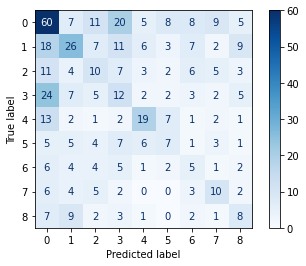

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
model12.fit(X_train,y_train)
yhat = model12.predict(X_test)

print("balanced_accuracy:", metrics.balanced_accuracy_score(y_test, yhat))

main_characters = pd.DataFrame(is_main_character)[is_main_character].index.values

metrics.plot_confusion_matrix(model12, X_test, y_test, labels = main_characters, display_labels = np.arange(9),
                             values_format = 'd', cmap=plt.cm.Blues)

line_counts = pd.DataFrame(mcu_partial["character"].value_counts())["character"]
table = pd.DataFrame({"plot legend": main_characters, "# of examples": line_counts})
table.reset_index(drop=True, inplace=True)

table

## Learning Curve

Do we have enough training examples?  Let's find out.

In [17]:
def plot_learning_curve(estimator, title, X, y, axes=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, verbose=3)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")

    return plot

[learning_curve] Training set sizes: [ 206  671 1136 1601 2066]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:   17.7s remaining:   37.7s
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:   30.4s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   40.9s finished


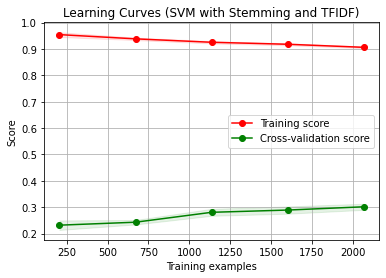

In [18]:
from sklearn.model_selection import learning_curve

title = "Learning Curves (SVM with Stemming and TFIDF)"

plot_learning_curve(model12, title, X, y, cv=cross_validator)

## Conclusions

SVM also did not perform very well on this dataset.  Just like with Random Forest and Naive Bayes, my guess is that there is just not enough data to predict character names based on text alone.